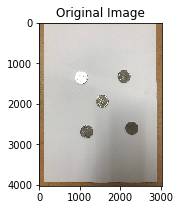

In [139]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('IMG1.jpg')
       
plt.rcParams['figure.figsize'] = (4,3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

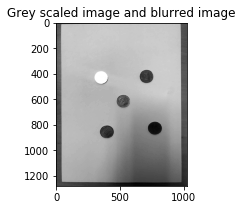

In [140]:
# grey scaled image and blurred image 
imS = cv2.resize(img, (1024, 1280)) 
imS = cv2.medianBlur(imS,7)
gray = cv2.cvtColor(imS, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (15, 15), 0)

plt.rcParams['figure.figsize'] = (4,3)
plt.imshow(gray_blur, cmap='gray')
plt.title('Grey scaled image and blurred image')
plt.show()

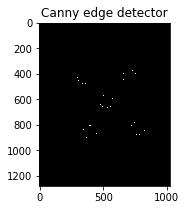

In [141]:
# canny edge detector
outline = cv2.Canny(gray_blur, 30, 135)

plt.rcParams['figure.figsize'] = (4,3)
plt.imshow(outline, cmap='gray')
plt.title('Canny edge detector')
plt.show()

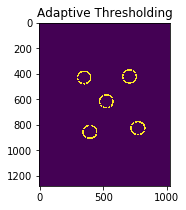

In [142]:
# Applying adaptive thresholding
thresh = cv2.adaptiveThreshold(outline, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 1)

plt.rcParams['figure.figsize'] = (4,3)
plt.imshow(thresh)
plt.title('Adaptive Thresholding')
plt.show()

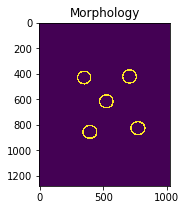

In [143]:
# Morphology
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=1)

plt.rcParams['figure.figsize'] = (4,3)
plt.imshow(closing)
plt.title('Morphology')
plt.show()

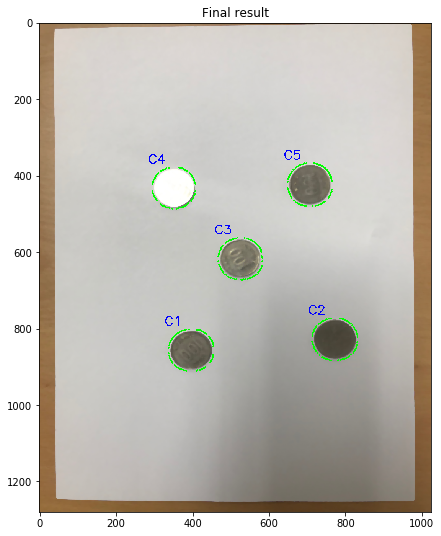

The total number of the coins : 5


In [144]:
cont_img = closing.copy()
_, contours, _ = cv2.findContours(cont_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    cv2.drawContours(imS, contours[i], -1, (0,255,0), 3)
    # add text
    x,y,w,h = cv2.boundingRect(contours[i])
    cv2.putText(imS, 'C' + str(i+1),(x-10,y-10),cv2.FONT_HERSHEY_SIMPLEX,1.1,(255,0,0),2)

plt.rcParams['figure.figsize'] = (16,9)
plt.imshow(cv2.cvtColor(imS, cv2.COLOR_BGR2RGB))
plt.title('Final result')
plt.show()

print("The total number of the coins : %i" % len(contours))